# 농산물 가격 예측을 위한 AI 모델 개발 

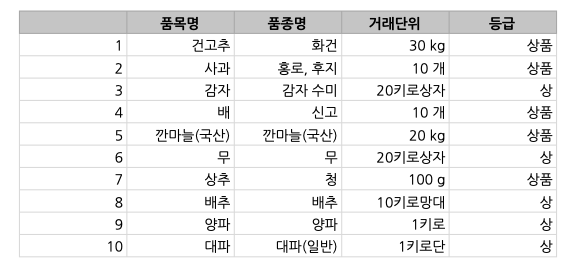

In [166]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocess

## 건고추

In [268]:
train = pd.read_csv("../data/raw_data/train/train.csv")

train_건고추 = train[(train['품목명'] == '건고추') & (train['품종명'] == '화건') & (train['거래단위'] == '30 kg') & (train['등급'] == '상품')]

train_건고추 = train_건고추[['평균가격(원)']]

In [269]:
test_00 = pd.read_csv("../data/raw_data/test/TEST_00.csv")

test_00_건고추 = test_00[(test_00['품목명'] == '건고추') & (test_00['품종명'] == '화건') & (test_00['거래단위'] == '30 kg') & (test_00['등급'] == '상품')]

test_00_건고추 = test_00_건고추[['평균가격(원)']]

# Model

In [270]:
# MinMaxScaler를 이용한 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_건고추)
test_scaled = scaler.fit_transform(test_00_건고추)

In [276]:
# 시계열 데이터를 위한 시퀀스 생성 함수
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length - 3):
        X.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length:i+seq_length+3, 0])
    return np.array(X), np.array(y)

In [278]:
# 시퀀스 길이 설정
seq_length = 9  # T-8 ~ T를 사용
X_train, y_train = create_sequences(train_scaled, seq_length)

In [279]:
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dense(3))  # T+1, T+2, T+3 예측

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\insu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [280]:
# 모델 학습
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # LSTM에 맞게 데이터 형태 변환
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2951
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2001 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1284 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1083 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0598 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0438 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0370 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0395 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0305 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0318 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0290 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0284 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0252 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0306 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0243 
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━

In [294]:
# 테스트 데이터도 시퀀스 형태로 변환
X_test = np.array([test_scaled.flatten()])  # 테스트 데이터의 마지막 9개 시점을 입력으로 사용
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 예측 수행
predicted = model.predict(X_test)
# 예측값을 원래 스케일로 역변환
predicted_prices = scaler.inverse_transform(np.concatenate((predicted, np.zeros((predicted.shape[0], 1))), axis=1))[:, :3]

# T+1, T+2, T+3 값을 개별적으로 출력
T_plus_1 = predicted_prices[0, 0]
T_plus_2 = predicted_prices[0, 1]
T_plus_3 = predicted_prices[0, 2]

# 결과 출력
print("예측값 (T+1):", T_plus_1)
print("예측값 (T+2):", T_plus_2)
print("예측값 (T+3):", T_plus_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
예측값 (T+1): 580634.0168091655
예측값 (T+2): 587748.1297850013
예측값 (T+3): 584070.5598082244


In [63]:
def process_data(data):
    품목_list = ['건고추', '사과', '감자', '배', '깐마늘(국산)', '무', '상추', '배추', '양파', '대파']
    
    conditions = {
           '감자': {
            'target': lambda df: (df['품종명'] == '감자 수미') & (df['거래단위'] == '20키로상자') & (df['등급'] == '상')
        },
        '건고추': {
            'target': lambda df: (df['품종명'] == '화건') & (df['거래단위'] == '30 kg') & (df['등급'] == '상품')
        },
        '깐마늘(국산)': {
            'target': lambda df: (df['거래단위'] == '20 kg') & (df['등급'] == '상품')
        },
        '대파': {
            'target': lambda df: (df['품종명'] == '대파(일반)') & (df['거래단위'] == '1키로단') & (df['등급'] == '상')
        },
        '무': {
            'target': lambda df: (df['거래단위'] == '20키로상자') & (df['등급'] == '상')
        },
        '배추': {
            'target': lambda df: (df['거래단위'] == '10키로망대') & (df['등급'] == '상')
        },
        '사과': {
            'target': lambda df: (df['품종명'].isin(['홍로', '후지'])) & (df['거래단위'] == '10 개') & (df['등급'] == '상품')
        },
        '상추': {
            'target': lambda df: (df['품종명'] == '청') & (df['거래단위'] == '100 g') & (df['등급'] == '상품')
        },
        '양파': {
            'target': lambda df: (df['품종명'] == '양파') & (df['거래단위'] == '1키로') & (df['등급'] == '상')
        },
        '배': {
            'target': lambda df: (df['품종명'] == '신고') & (df['거래단위'] == '10 개') & (df['등급'] == '상품')
        }
    }

    a = pd.DataFrame()

    for i in 품목_list :
        # 타겟 데이터 필터링
        data_품목 = data[data['품목명'] == i]
        target_mask = conditions[i]['target'](data_품목)
        filtered_data = data_품목[target_mask]
        a = pd.concat([a,filtered_data])

    a = a.reset_index(drop=True)
    
    return a

In [64]:
train = process_data(train)

In [65]:
train.shape

(1440, 7)

In [71]:


test_00 = process_data(test_00)

In [73]:
sub = pd.read_csv("../data/raw_data/sample_submission.csv")

In [76]:
test_00

,시점,품목명,품종명,거래단위,등급,평년 평균가격(원),평균가격(원)
0,T-8순,건고추,화건,30 kg,상품,537302.666667,552000.000000
1,T-7순,건고추,화건,30 kg,상품,534742.000000,555743.000000
2,T-6순,건고추,화건,30 kg,상품,537408.666667,559794.000000
3,T-5순,건고추,화건,30 kg,상품,592768.000000,578819.000000
4,T-4순,건고추,화건,30 kg,상품,0.000000,579167.000000
...,...,...,...,...,...,...,...
85,T-4순,대파,대파(일반),1키로단,상,1927.722222,1631.222222
86,T-3순,대파,대파(일반),1키로단,상,2081.092593,2060.750000
87,T-2순,대파,대파(일반),1키로단,상,2035.937169,1660.285714
88,T-1순,대파,대파(일반),1키로단,상,2003.476852,1694.666667


In [75]:
sub[:3]

,시점,감자,건고추,깐마늘(국산),대파,무,배추,사과,상추,양파,배
0,TEST_00+1순,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TEST_00+2순,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TEST_00+3순,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
def process_data(raw_file, 산지공판장_file, 전국도매_file, 품목명, scaler=None):
    raw_data = pd.read_csv(raw_file)
    산지공판장 = pd.read_csv(산지공판장_file)
    전국도매 = pd.read_csv(전국도매_file)

    # 타겟 및 메타데이터 필터 조건 정의
    conditions = {
    '감자': {
        'target': lambda df: (df['품종명'] == '감자 수미') & (df['거래단위'] == '20키로상자') & (df['등급'] == '상'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['감자'], '품종명': ['수미'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['감자'], '품종명': ['수미']}
    },
    '건고추': {
        'target': lambda df: (df['품종명'] == '화건') & (df['거래단위'] == '30 kg') & (df['등급'] == '상품'),
        '공판장': None, 
        '도매': None  
    },
    '깐마늘(국산)': {
        'target': lambda df: (df['거래단위'] == '20 kg') & (df['등급'] == '상품'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['마늘'], '품종명': ['깐마늘'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['마늘'], '품종명': ['깐마늘']}
    },
    '대파': {
        'target': lambda df: (df['품종명'] == '대파(일반)') & (df['거래단위'] == '1키로단') & (df['등급'] == '상'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['대파'], '품종명': ['대파(일반)'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['대파'], '품종명': ['대파(일반)']}
    },
    '무': {
        'target': lambda df: (df['거래단위'] == '20키로상자') & (df['등급'] == '상'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['무'], '품종명': ['기타무'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['무'], '품종명': ['무']}
    },
    '배추': {
        'target': lambda df: (df['거래단위'] == '10키로망대') & (df['등급'] == '상'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['배추'], '품종명': ['쌈배추'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['배추'], '품종명': ['배추']}
    },
    '사과': {
        'target': lambda df: (df['품종명'].isin(['홍로', '후지'])) & (df['거래단위'] == '10 개') & (df['등급'] == '상품'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['사과'], '품종명': ['후지'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['사과'], '품종명': ['후지']}
    },
    '상추': {
        'target': lambda df: (df['품종명'] == '청') & (df['거래단위'] == '100 g') & (df['등급'] == '상품'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['상추'], '품종명': ['청상추'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['상추'], '품종명': ['청상추']}
    },
    '양파': {
        'target': lambda df: (df['품종명'] == '양파') & (df['거래단위'] == '1키로') & (df['등급'] == '상'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['양파'], '품종명': ['기타양파'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['양파'], '품종명': ['양파(일반)']}
    },
    '배': {
        'target': lambda df: (df['품종명'] == '신고') & (df['거래단위'] == '10 개') & (df['등급'] == '상품'),
        '공판장': {'공판장명': ['*전국농협공판장'], '품목명': ['배'], '품종명': ['신고'], '등급명': ['상']},
        '도매': {'시장명': ['*전국도매시장'], '품목명': ['배'], '품종명': ['신고']}
    }
    }

    # 타겟 데이터 필터링
    raw_품목 = raw_data[raw_data['품목명'] == 품목명]
    target_mask = conditions[품목명]['target'](raw_품목)
    filtered_data = raw_품목[target_mask]

    # 다른 품종에 대한 파생변수 생성
    other_data = raw_품목[~target_mask]
    unique_combinations = other_data[['품종명', '거래단위', '등급']].drop_duplicates()
    for _, row in unique_combinations.iterrows():
        품종명, 거래단위, 등급 = row['품종명'], row['거래단위'], row['등급']
        mask = (other_data['품종명'] == 품종명) & (other_data['거래단위'] == 거래단위) & (other_data['등급'] == 등급)
        temp_df = other_data[mask]
        for col in ['평년 평균가격(원)', '평균가격(원)']:
            new_col_name = f'{품종명}_{거래단위}_{등급}_{col}'
            filtered_data = filtered_data.merge(temp_df[['시점', col]], on='시점', how='left', suffixes=('', f'_{new_col_name}'))
            filtered_data.rename(columns={f'{col}_{new_col_name}': new_col_name}, inplace=True)


    # 공판장 데이터 처리
    if conditions[품목명]['공판장']:
        filtered_공판장 = 산지공판장
        for key, value in conditions[품목명]['공판장'].items():
            filtered_공판장 = filtered_공판장[filtered_공판장[key].isin(value)]
        
        filtered_공판장 = filtered_공판장.add_prefix('공판장_').rename(columns={'공판장_시점': '시점'})
        filtered_data = filtered_data.merge(filtered_공판장, on='시점', how='left')

    # 도매 데이터 처리
    if conditions[품목명]['도매']:
        filtered_도매 = 전국도매
        for key, value in conditions[품목명]['도매'].items():
            filtered_도매 = filtered_도매[filtered_도매[key].isin(value)]
        
        filtered_도매 = filtered_도매.add_prefix('도매_').rename(columns={'도매_시점': '시점'})
        filtered_data = filtered_data.merge(filtered_도매, on='시점', how='left')

    # 수치형 컬럼 처리
    numeric_columns = filtered_data.select_dtypes(include=[np.number]).columns
    filtered_data = filtered_data[['시점'] + list(numeric_columns)]
    filtered_data[numeric_columns] = filtered_data[numeric_columns].fillna(0)

    # 정규화 적용
    if scaler is None:
        scaler = MinMaxScaler()
        filtered_data[numeric_columns] = scaler.fit_transform(filtered_data[numeric_columns])
    else:
        filtered_data[numeric_columns] = scaler.transform(filtered_data[numeric_columns])

    return filtered_data, scaler

# Import Library

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from types import SimpleNamespace
from sklearn.preprocessing import MinMaxScaler
import os

# Hyperparameter Setting

In [2]:
config = {
    "learning_rate": 2e-5,
    "epoch": 30,
    "batch_size": 64,
    "hidden_size": 64,
    "num_layers": 2,
    "output_size": 3
}

CFG = SimpleNamespace(**config)

품목_리스트 = ['건고추', '사과', '감자', '배', '깐마늘(국산)', '무', '상추', '배추', '양파', '대파']

# Define Function for Feature Engineering
- 타겟의 필터 조건을 제외한 메타데이터의 필터 조건은 참가자들 각자의 기준에 맞춰 자유롭게 사용가능 
- 밑의 필터 조건은 임의로 제공하는 예시

# Define Custom Dataset Class

In [4]:
class AgriculturePriceDataset(Dataset):
    def __init__(self, dataframe, window_size=9, prediction_length=3, is_test=False):
        self.data = dataframe
        self.window_size = window_size
        self.prediction_length = prediction_length
        self.is_test = is_test
        
        self.price_column = [col for col in self.data.columns if '평균가격(원)' in col and len(col.split('_')) == 1][0]
        self.numeric_columns = self.data.select_dtypes(include=[np.number]).columns.tolist()
        
        self.sequences = []
        if not self.is_test:
            for i in range(len(self.data) - self.window_size - self.prediction_length + 1):
                x = self.data[self.numeric_columns].iloc[i:i+self.window_size].values
                y = self.data[self.price_column].iloc[i+self.window_size:i+self.window_size+self.prediction_length].values
                self.sequences.append((x, y))
        else:
            self.sequences = [self.data[self.numeric_columns].values]
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        if not self.is_test:
            x, y = self.sequences[idx]
            return torch.FloatTensor(x), torch.FloatTensor(y)
        else:
            return torch.FloatTensor(self.sequences[idx])

# Define Model Architecture and Training Functions

In [5]:

class PricePredictionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(PricePredictionLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)  

def evaluate_model(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            total_loss += loss.item()
    return total_loss / len(test_loader)

# Train Models and Generate Predictions

In [9]:
품목별_predictions = {}
품목별_scalers = {}

pbar_outer = tqdm(품목_리스트, desc="품목 처리 중", position=0)
for 품목명 in pbar_outer:
    pbar_outer.set_description(f"품목별 전처리 및 모델 학습 -> {품목명}")
    train_data, scaler = process_data("../data/raw_data/train/train.csv", 
                              "../data/raw_data/train/meta/TRAIN_산지공판장_2018-2021.csv", 
                              "../data/raw_data/train/meta/TRAIN_전국도매_2018-2021.csv", 
                              품목명)
    품목별_scalers[품목명] = scaler
    dataset = AgriculturePriceDataset(train_data)

    # 데이터를 train과 validation으로 분할
    train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
    
    train_loader = DataLoader(train_data, CFG.batch_size, shuffle=True)
    val_loader = DataLoader(val_data, CFG.batch_size, shuffle=False)

    input_size = len(dataset.numeric_columns)
    
    model = PricePredictionLSTM(input_size, CFG.hidden_size, CFG.num_layers, CFG.output_size)
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), CFG.learning_rate)
    
    best_val_loss = float('inf')
    os.makedirs('models', exist_ok=True)

    for epoch in range(CFG.epoch):
        train_loss = train_model(model, train_loader, criterion, optimizer, CFG.epoch)
        val_loss = evaluate_model(model, val_loader, criterion)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), f'models/best_model_{품목명}.pth')
        
        print(f'Epoch {epoch+1}/{CFG.epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    print(f'Best Validation Loss for {품목명}: {best_val_loss:.4f}')
    
    품목_predictions = []

    ### 추론 
    pbar_inner = tqdm(range(25), desc="테스트 파일 추론 중", position=1, leave=False)
    for i in pbar_inner:
        test_file = f"../data/raw_data/test/TEST_{i:02d}.csv"
        산지공판장_file = f"../data/raw_data/test/meta/TEST_산지공판장_{i:02d}.csv"
        전국도매_file = f"../data/raw_data/test/meta/TEST_전국도매_{i:02d}.csv"
        
        test_data, _ = process_data(test_file, 산지공판장_file, 전국도매_file, 품목명, scaler=품목별_scalers[품목명])
        test_dataset = AgriculturePriceDataset(test_data, is_test=True)
        test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

        model.eval()
        predictions = []
        with torch.no_grad():
            for batch in test_loader:
                output = model(batch)
                predictions.append(output.numpy())
        
        predictions_array = np.concatenate(predictions)

        # 예측값을 원래 스케일로 복원
        price_column_index = test_data.columns.get_loc(test_dataset.price_column)
        predictions_reshaped = predictions_array.reshape(-1, 1)
        
        # 가격 열에 대해서만 inverse_transform 적용
        price_scaler = MinMaxScaler()
        price_scaler.min_ = 품목별_scalers[품목명].min_[price_column_index]
        price_scaler.scale_ = 품목별_scalers[품목명].scale_[price_column_index]
        predictions_original_scale = price_scaler.inverse_transform(predictions_reshaped)
        #print(predictions_original_scale)
        
        if np.isnan(predictions_original_scale).any():
            pbar_inner.set_postfix({"상태": "NaN"})
        else:
            pbar_inner.set_postfix({"상태": "정상"})
            품목_predictions.extend(predictions_original_scale.flatten())

            
    품목별_predictions[품목명] = 품목_predictions
    pbar_outer.update(1)


품목 처리 중:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.7702, Val Loss: 0.7509
Epoch 2/30, Train Loss: 0.7748, Val Loss: 0.7501
Epoch 3/30, Train Loss: 0.7714, Val Loss: 0.7493
Epoch 4/30, Train Loss: 0.7703, Val Loss: 0.7485
Epoch 5/30, Train Loss: 0.7651, Val Loss: 0.7476
Epoch 6/30, Train Loss: 0.7678, Val Loss: 0.7468
Epoch 7/30, Train Loss: 0.7659, Val Loss: 0.7460
Epoch 8/30, Train Loss: 0.7627, Val Loss: 0.7452
Epoch 9/30, Train Loss: 0.7633, Val Loss: 0.7444
Epoch 10/30, Train Loss: 0.7608, Val Loss: 0.7436
Epoch 11/30, Train Loss: 0.7650, Val Loss: 0.7428
Epoch 12/30, Train Loss: 0.7642, Val Loss: 0.7420
Epoch 13/30, Train Loss: 0.7622, Val Loss: 0.7412
Epoch 14/30, Train Loss: 0.7603, Val Loss: 0.7404
Epoch 15/30, Train Loss: 0.7606, Val Loss: 0.7396
Epoch 16/30, Train Loss: 0.7555, Val Loss: 0.7388
Epoch 17/30, Train Loss: 0.7592, Val Loss: 0.7380
Epoch 18/30, Train Loss: 0.7536, Val Loss: 0.7373
Epoch 19/30, Train Loss: 0.7567, Val Loss: 0.7365
Epoch 20/30, Train Loss: 0.7587, Val Loss: 0.7357
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.8465, Val Loss: 0.8505
Epoch 2/30, Train Loss: 0.8424, Val Loss: 0.8495
Epoch 3/30, Train Loss: 0.8399, Val Loss: 0.8485
Epoch 4/30, Train Loss: 0.8431, Val Loss: 0.8475
Epoch 5/30, Train Loss: 0.8413, Val Loss: 0.8465
Epoch 6/30, Train Loss: 0.8405, Val Loss: 0.8456
Epoch 7/30, Train Loss: 0.8354, Val Loss: 0.8446
Epoch 8/30, Train Loss: 0.8385, Val Loss: 0.8436
Epoch 9/30, Train Loss: 0.8394, Val Loss: 0.8426
Epoch 10/30, Train Loss: 0.8343, Val Loss: 0.8416
Epoch 11/30, Train Loss: 0.8353, Val Loss: 0.8406
Epoch 12/30, Train Loss: 0.8324, Val Loss: 0.8396
Epoch 13/30, Train Loss: 0.8308, Val Loss: 0.8386
Epoch 14/30, Train Loss: 0.8276, Val Loss: 0.8376
Epoch 15/30, Train Loss: 0.8296, Val Loss: 0.8366
Epoch 16/30, Train Loss: 0.8292, Val Loss: 0.8356
Epoch 17/30, Train Loss: 0.8251, Val Loss: 0.8346
Epoch 18/30, Train Loss: 0.8256, Val Loss: 0.8336
Epoch 19/30, Train Loss: 0.8256, Val Loss: 0.8327
Epoch 20/30, Train Loss: 0.8259, Val Loss: 0.8317
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.4316, Val Loss: 0.3526
Epoch 2/30, Train Loss: 0.4369, Val Loss: 0.3517
Epoch 3/30, Train Loss: 0.4370, Val Loss: 0.3508
Epoch 4/30, Train Loss: 0.4283, Val Loss: 0.3499
Epoch 5/30, Train Loss: 0.4216, Val Loss: 0.3489
Epoch 6/30, Train Loss: 0.4291, Val Loss: 0.3480
Epoch 7/30, Train Loss: 0.4265, Val Loss: 0.3471
Epoch 8/30, Train Loss: 0.4249, Val Loss: 0.3462
Epoch 9/30, Train Loss: 0.4300, Val Loss: 0.3453
Epoch 10/30, Train Loss: 0.4265, Val Loss: 0.3445
Epoch 11/30, Train Loss: 0.4200, Val Loss: 0.3436
Epoch 12/30, Train Loss: 0.4295, Val Loss: 0.3427
Epoch 13/30, Train Loss: 0.4177, Val Loss: 0.3418
Epoch 14/30, Train Loss: 0.4150, Val Loss: 0.3409
Epoch 15/30, Train Loss: 0.4182, Val Loss: 0.3401
Epoch 16/30, Train Loss: 0.4086, Val Loss: 0.3392
Epoch 17/30, Train Loss: 0.4174, Val Loss: 0.3384
Epoch 18/30, Train Loss: 0.4224, Val Loss: 0.3375
Epoch 19/30, Train Loss: 0.4073, Val Loss: 0.3366
Epoch 20/30, Train Loss: 0.4128, Val Loss: 0.3358
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.3947, Val Loss: 0.4371
Epoch 2/30, Train Loss: 0.4034, Val Loss: 0.4362
Epoch 3/30, Train Loss: 0.4019, Val Loss: 0.4354
Epoch 4/30, Train Loss: 0.3978, Val Loss: 0.4346
Epoch 5/30, Train Loss: 0.3873, Val Loss: 0.4337
Epoch 6/30, Train Loss: 0.3908, Val Loss: 0.4329
Epoch 7/30, Train Loss: 0.4017, Val Loss: 0.4321
Epoch 8/30, Train Loss: 0.3956, Val Loss: 0.4312
Epoch 9/30, Train Loss: 0.3912, Val Loss: 0.4304
Epoch 10/30, Train Loss: 0.3895, Val Loss: 0.4296
Epoch 11/30, Train Loss: 0.3936, Val Loss: 0.4288
Epoch 12/30, Train Loss: 0.4038, Val Loss: 0.4279
Epoch 13/30, Train Loss: 0.3854, Val Loss: 0.4271
Epoch 14/30, Train Loss: 0.3924, Val Loss: 0.4263
Epoch 15/30, Train Loss: 0.3869, Val Loss: 0.4254
Epoch 16/30, Train Loss: 0.3951, Val Loss: 0.4246
Epoch 17/30, Train Loss: 0.3940, Val Loss: 0.4238
Epoch 18/30, Train Loss: 0.3928, Val Loss: 0.4230
Epoch 19/30, Train Loss: 0.3861, Val Loss: 0.4221
Epoch 20/30, Train Loss: 0.3947, Val Loss: 0.4213
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.0667, Val Loss: 0.0667
Epoch 2/30, Train Loss: 0.0658, Val Loss: 0.0658
Epoch 3/30, Train Loss: 0.0648, Val Loss: 0.0649
Epoch 4/30, Train Loss: 0.0640, Val Loss: 0.0640
Epoch 5/30, Train Loss: 0.0631, Val Loss: 0.0631
Epoch 6/30, Train Loss: 0.0622, Val Loss: 0.0622
Epoch 7/30, Train Loss: 0.0614, Val Loss: 0.0614
Epoch 8/30, Train Loss: 0.0605, Val Loss: 0.0605
Epoch 9/30, Train Loss: 0.0597, Val Loss: 0.0597
Epoch 10/30, Train Loss: 0.0588, Val Loss: 0.0589
Epoch 11/30, Train Loss: 0.0581, Val Loss: 0.0581
Epoch 12/30, Train Loss: 0.0574, Val Loss: 0.0574
Epoch 13/30, Train Loss: 0.0565, Val Loss: 0.0566
Epoch 14/30, Train Loss: 0.0559, Val Loss: 0.0559
Epoch 15/30, Train Loss: 0.0552, Val Loss: 0.0551
Epoch 16/30, Train Loss: 0.0543, Val Loss: 0.0544
Epoch 17/30, Train Loss: 0.0536, Val Loss: 0.0536
Epoch 18/30, Train Loss: 0.0529, Val Loss: 0.0529
Epoch 19/30, Train Loss: 0.0522, Val Loss: 0.0522
Epoch 20/30, Train Loss: 0.0514, Val Loss: 0.0514
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.0652, Val Loss: 0.0645
Epoch 2/30, Train Loss: 0.0644, Val Loss: 0.0637
Epoch 3/30, Train Loss: 0.0635, Val Loss: 0.0629
Epoch 4/30, Train Loss: 0.0628, Val Loss: 0.0621
Epoch 5/30, Train Loss: 0.0621, Val Loss: 0.0613
Epoch 6/30, Train Loss: 0.0613, Val Loss: 0.0605
Epoch 7/30, Train Loss: 0.0603, Val Loss: 0.0597
Epoch 8/30, Train Loss: 0.0595, Val Loss: 0.0589
Epoch 9/30, Train Loss: 0.0587, Val Loss: 0.0581
Epoch 10/30, Train Loss: 0.0581, Val Loss: 0.0574
Epoch 11/30, Train Loss: 0.0572, Val Loss: 0.0566
Epoch 12/30, Train Loss: 0.0565, Val Loss: 0.0558
Epoch 13/30, Train Loss: 0.0558, Val Loss: 0.0551
Epoch 14/30, Train Loss: 0.0550, Val Loss: 0.0543
Epoch 15/30, Train Loss: 0.0541, Val Loss: 0.0535
Epoch 16/30, Train Loss: 0.0534, Val Loss: 0.0527
Epoch 17/30, Train Loss: 0.0526, Val Loss: 0.0520
Epoch 18/30, Train Loss: 0.0518, Val Loss: 0.0512
Epoch 19/30, Train Loss: 0.0511, Val Loss: 0.0504
Epoch 20/30, Train Loss: 0.0502, Val Loss: 0.0496
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.3195, Val Loss: 0.3481
Epoch 2/30, Train Loss: 0.3324, Val Loss: 0.3474
Epoch 3/30, Train Loss: 0.3246, Val Loss: 0.3467
Epoch 4/30, Train Loss: 0.3057, Val Loss: 0.3460
Epoch 5/30, Train Loss: 0.3131, Val Loss: 0.3453
Epoch 6/30, Train Loss: 0.3135, Val Loss: 0.3446
Epoch 7/30, Train Loss: 0.3128, Val Loss: 0.3438
Epoch 8/30, Train Loss: 0.3204, Val Loss: 0.3431
Epoch 9/30, Train Loss: 0.3169, Val Loss: 0.3424
Epoch 10/30, Train Loss: 0.3050, Val Loss: 0.3417
Epoch 11/30, Train Loss: 0.3117, Val Loss: 0.3410
Epoch 12/30, Train Loss: 0.3099, Val Loss: 0.3403
Epoch 13/30, Train Loss: 0.3023, Val Loss: 0.3396
Epoch 14/30, Train Loss: 0.3160, Val Loss: 0.3389
Epoch 15/30, Train Loss: 0.3155, Val Loss: 0.3382
Epoch 16/30, Train Loss: 0.3034, Val Loss: 0.3375
Epoch 17/30, Train Loss: 0.3098, Val Loss: 0.3367
Epoch 18/30, Train Loss: 0.3043, Val Loss: 0.3360
Epoch 19/30, Train Loss: 0.3094, Val Loss: 0.3353
Epoch 20/30, Train Loss: 0.3084, Val Loss: 0.3346
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.2931, Val Loss: 0.2756
Epoch 2/30, Train Loss: 0.2998, Val Loss: 0.2747
Epoch 3/30, Train Loss: 0.2964, Val Loss: 0.2738
Epoch 4/30, Train Loss: 0.2896, Val Loss: 0.2728
Epoch 5/30, Train Loss: 0.2863, Val Loss: 0.2719
Epoch 6/30, Train Loss: 0.2912, Val Loss: 0.2710
Epoch 7/30, Train Loss: 0.2921, Val Loss: 0.2700
Epoch 8/30, Train Loss: 0.2902, Val Loss: 0.2691
Epoch 9/30, Train Loss: 0.2865, Val Loss: 0.2682
Epoch 10/30, Train Loss: 0.2859, Val Loss: 0.2673
Epoch 11/30, Train Loss: 0.2771, Val Loss: 0.2664
Epoch 12/30, Train Loss: 0.2879, Val Loss: 0.2655
Epoch 13/30, Train Loss: 0.2834, Val Loss: 0.2646
Epoch 14/30, Train Loss: 0.2841, Val Loss: 0.2637
Epoch 15/30, Train Loss: 0.2900, Val Loss: 0.2628
Epoch 16/30, Train Loss: 0.2837, Val Loss: 0.2619
Epoch 17/30, Train Loss: 0.2859, Val Loss: 0.2610
Epoch 18/30, Train Loss: 0.2820, Val Loss: 0.2601
Epoch 19/30, Train Loss: 0.2721, Val Loss: 0.2592
Epoch 20/30, Train Loss: 0.2752, Val Loss: 0.2583
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.4891, Val Loss: 0.4865
Epoch 2/30, Train Loss: 0.4831, Val Loss: 0.4854
Epoch 3/30, Train Loss: 0.4873, Val Loss: 0.4843
Epoch 4/30, Train Loss: 0.4799, Val Loss: 0.4832
Epoch 5/30, Train Loss: 0.4822, Val Loss: 0.4821
Epoch 6/30, Train Loss: 0.4843, Val Loss: 0.4809
Epoch 7/30, Train Loss: 0.4788, Val Loss: 0.4798
Epoch 8/30, Train Loss: 0.4774, Val Loss: 0.4787
Epoch 9/30, Train Loss: 0.4822, Val Loss: 0.4776
Epoch 10/30, Train Loss: 0.4815, Val Loss: 0.4765
Epoch 11/30, Train Loss: 0.4735, Val Loss: 0.4754
Epoch 12/30, Train Loss: 0.4657, Val Loss: 0.4743
Epoch 13/30, Train Loss: 0.4660, Val Loss: 0.4732
Epoch 14/30, Train Loss: 0.4725, Val Loss: 0.4721
Epoch 15/30, Train Loss: 0.4636, Val Loss: 0.4710
Epoch 16/30, Train Loss: 0.4671, Val Loss: 0.4699
Epoch 17/30, Train Loss: 0.4663, Val Loss: 0.4688
Epoch 18/30, Train Loss: 0.4640, Val Loss: 0.4677
Epoch 19/30, Train Loss: 0.4615, Val Loss: 0.4666
Epoch 20/30, Train Loss: 0.4606, Val Loss: 0.4655
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/30, Train Loss: 0.4655, Val Loss: 0.4118
Epoch 2/30, Train Loss: 0.4634, Val Loss: 0.4107
Epoch 3/30, Train Loss: 0.4660, Val Loss: 0.4097
Epoch 4/30, Train Loss: 0.4591, Val Loss: 0.4086
Epoch 5/30, Train Loss: 0.4586, Val Loss: 0.4075
Epoch 6/30, Train Loss: 0.4606, Val Loss: 0.4064
Epoch 7/30, Train Loss: 0.4554, Val Loss: 0.4054
Epoch 8/30, Train Loss: 0.4464, Val Loss: 0.4043
Epoch 9/30, Train Loss: 0.4492, Val Loss: 0.4032
Epoch 10/30, Train Loss: 0.4536, Val Loss: 0.4021
Epoch 11/30, Train Loss: 0.4508, Val Loss: 0.4010
Epoch 12/30, Train Loss: 0.4444, Val Loss: 0.4000
Epoch 13/30, Train Loss: 0.4453, Val Loss: 0.3989
Epoch 14/30, Train Loss: 0.4439, Val Loss: 0.3978
Epoch 15/30, Train Loss: 0.4432, Val Loss: 0.3967
Epoch 16/30, Train Loss: 0.4484, Val Loss: 0.3956
Epoch 17/30, Train Loss: 0.4390, Val Loss: 0.3945
Epoch 18/30, Train Loss: 0.4434, Val Loss: 0.3934
Epoch 19/30, Train Loss: 0.4414, Val Loss: 0.3924
Epoch 20/30, Train Loss: 0.4410, Val Loss: 0.3913
Epoch 21/

테스트 파일 추론 중:   0%|          | 0/25 [00:00<?, ?it/s]

# Prepare Submission File

In [10]:
sample_submission = pd.read_csv('../data/raw_data/sample_submission.csv')

for 품목명, predictions in 품목별_predictions.items():
    sample_submission[품목명] = predictions

In [12]:
# 결과 저장
sample_submission.to_csv('../data/submission/baseline_submission.csv', index=False)